In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
steelers_csvs = os.listdir('../CSVs/Steelers_CSVs')
steelers_dfs = [pd.read_csv('../CSVs/Steelers_CSVs/'+csv) for csv in steelers_csvs]

for df in steelers_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [39]:
steelers_dfs[0].head() # 0 = Bears #

Unnamed: 0                   ID                      Date           User  \
0           0  1569475673764536320 2022-09-12 23:58:54+00:00  MrWStrokerNFL   
1           1  1569474604158308352 2022-09-12 23:54:39+00:00  Steelersdepot   
2           2  1569474061306314757 2022-09-12 23:52:30+00:00  Steelersdepot   
3           3  1569473600234856448 2022-09-12 23:50:40+00:00  sdextrasmedia   
4           4  1569473257408954368 2022-09-12 23:49:18+00:00    Blitz_Burgh   

                                               Tweet                 HashTags  \
0  There are strong reports that #Steelers backup...  ['Steelers', 'Cowboys']   
1  Steelers DT Cam Heyward Talks Win vs Bengals, ...      ['Steelers', 'NFL']   
2  Amazing INT by Cam Sutton #Steelers #NFL https...      ['Steelers', 'NFL']   
3  Neil O'Donnell leads a list #Steelers #NFL htt...      ['Steelers', 'NFL']   
4  Neil O’Donnell. 👀 #Steelers #NFL https://t.co/...      ['Steelers', 'NFL']   

   Likes  Retweets MentionUsers LocationCoordinates  \
0     13         0          NaN                 NaN   
1     14         1          NaN                 NaN   
2     72         0          NaN                 NaN   
3    271        28          NaN                 NaN   
4    268         4          NaN                 NaN   

                                         clean_Tweet  \
0  there are strong reports that backup qb mason ...   
1  steelers dt cam heyward talks win vs bengals t...   
2                          amazing int by cam sutton   
3                           neil odonnell leads list   
4                                     neil o donnell   

                                  Sentiment_Analysis  Positive_Sentiment  \
0  {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...                True   
1  {'neg': 0.11, 'neu': 0.589, 'pos': 0.301, 'com...                True   
2  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...                True   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...               False   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...               False   

   Compound_Sentiment Score  
0                    0.5106  
1                    0.7076  
2                    0.5859  
3                    0.0000  
4                    0.0000

In [40]:
b_game_1 = steelers_dfs[0]

In [41]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
Blitz_Burgh      2
Bob36810941      2
Steelersdepot    2
sdextrasmedia    2
MrWStrokerNFL    1
dtype: int64


User
jrotten77    1
dtype: int64

In [42]:
steelers_dfs[0].columns

Index(['Unnamed: 0', 'ID', 'Date', 'User', 'Tweet', 'HashTags', 'Likes',
       'Retweets', 'MentionUsers', 'LocationCoordinates', 'clean_Tweet',
       'Sentiment_Analysis', 'Positive_Sentiment', 'Compound_Sentiment Score'],
      dtype='object')

In [43]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

In [44]:
steelers_csvs

['SteelersBengals.csv',
 'SteelersBills.csv',
 'SteelersBrowns.csv',
 'SteelersBucs.csv',
 'SteelersDolphins.csv',
 'SteelersEagles.csv',
 'SteelersJets.csv',
 'SteelersPatriots.csv',
 'SteelersSaints.csv',
 'Steelers_Game10_Bengals.csv',
 'Steelers_Game11_Colts.csv',
 'Steelers_Game1_Bengals.csv',
 'Steelers_Game2_Patriots.csv',
 'Steelers_Game3_Browns.csv',
 'Steelers_Game4_Jets.csv',
 'Steelers_Game5_Bills.csv',
 'Steelers_Game6_Bucaneers.csv',
 'Steelers_Game7_Dolphins.csv',
 'Steelers_Game8_Eagles.csv',
 'Steelers_Game9_Saints.csv',
 'Steelers_Pre_Game1_Seahawks.csv',
 'Steelers_Pre_Game2_Jaguars.csv',
 'Steelers_Pre_Game3_Lions.csv']

In [45]:
# users = steelers_dfs[0].groupby(['User']).size().sort_values(ascending=False).head(5)
# l = list(users.index.values) 
# make_scatter_and_pie_figure(remove_users_from_df(steelers_dfs[0], l), 'Steelers  Bears - Removed Users')

KeyError: 'Compound_Sentiment_Score'

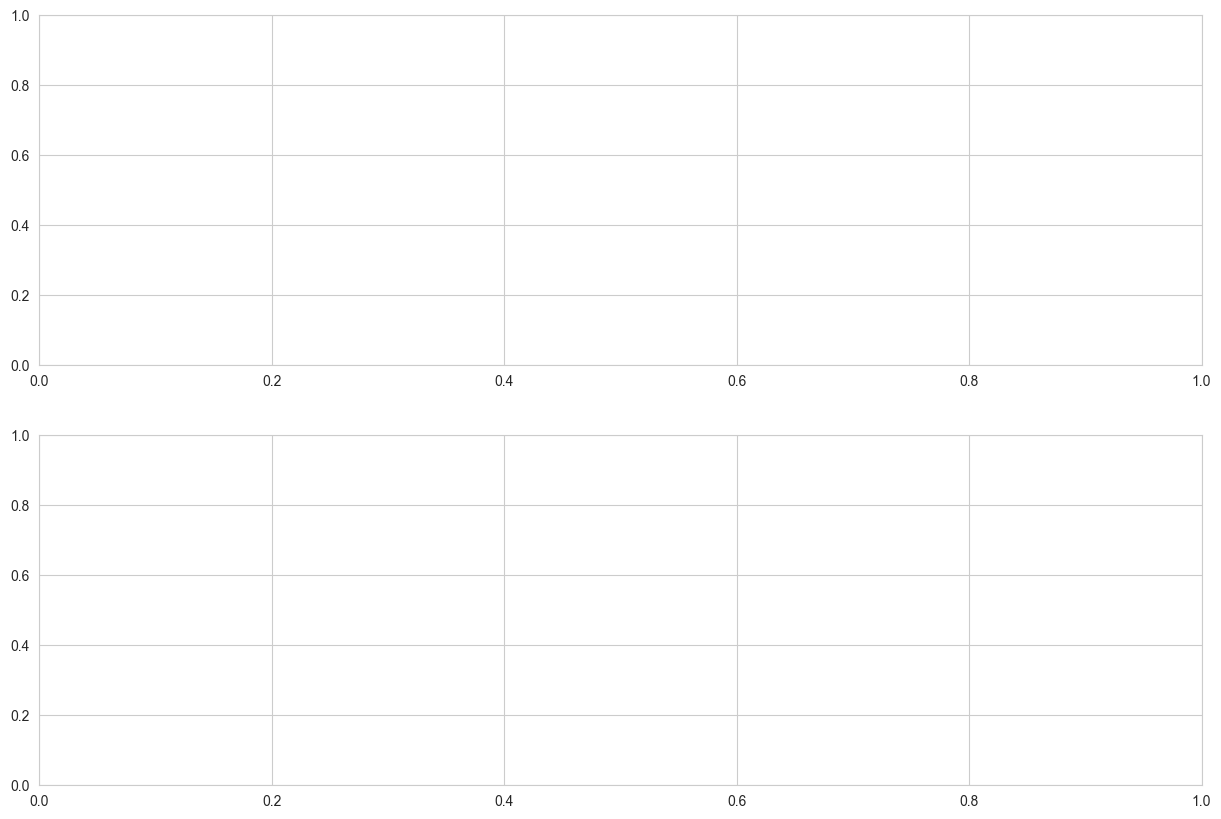

In [46]:
make_scatter_and_pie_figure(steelers_dfs[1], 'SteelersBengals', save = True)

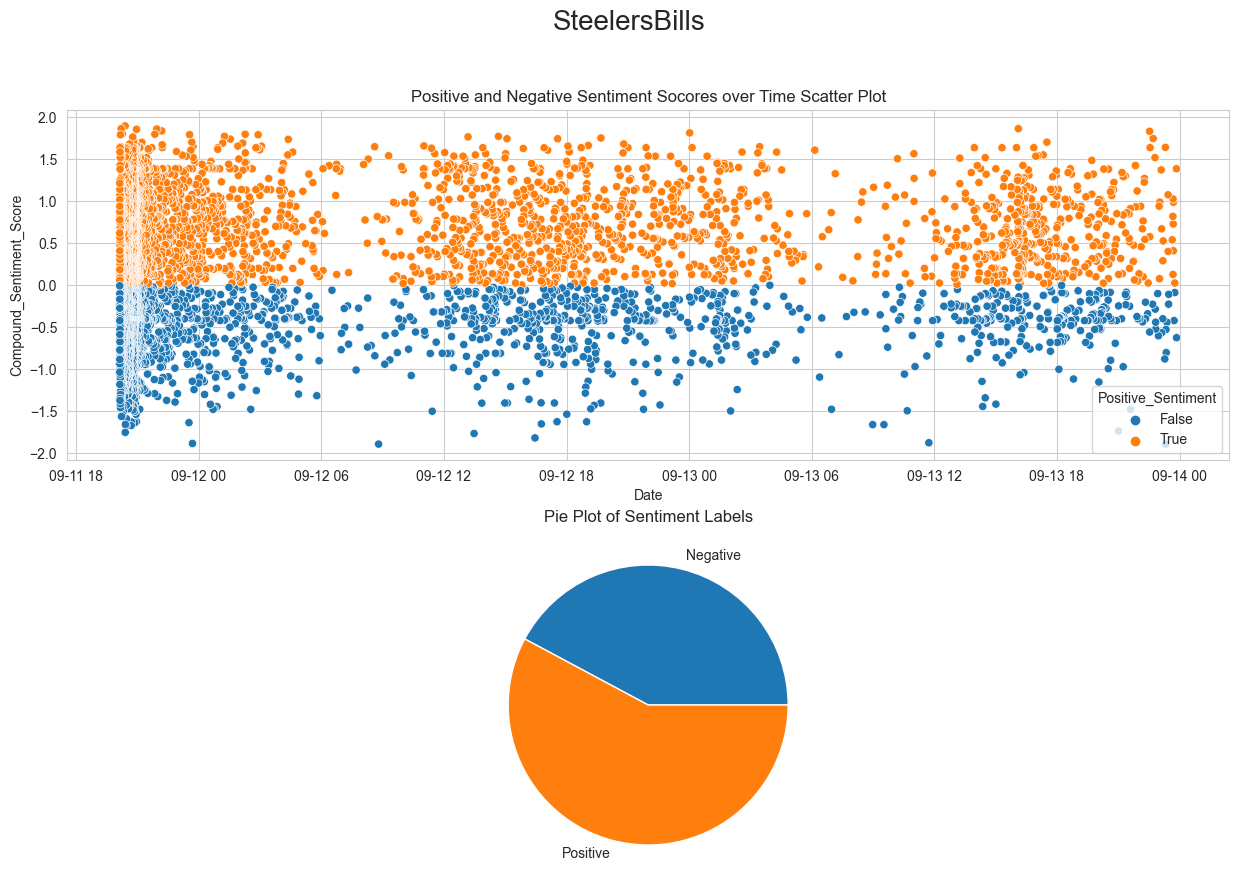

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[2], 'SteelersBills', save = True)

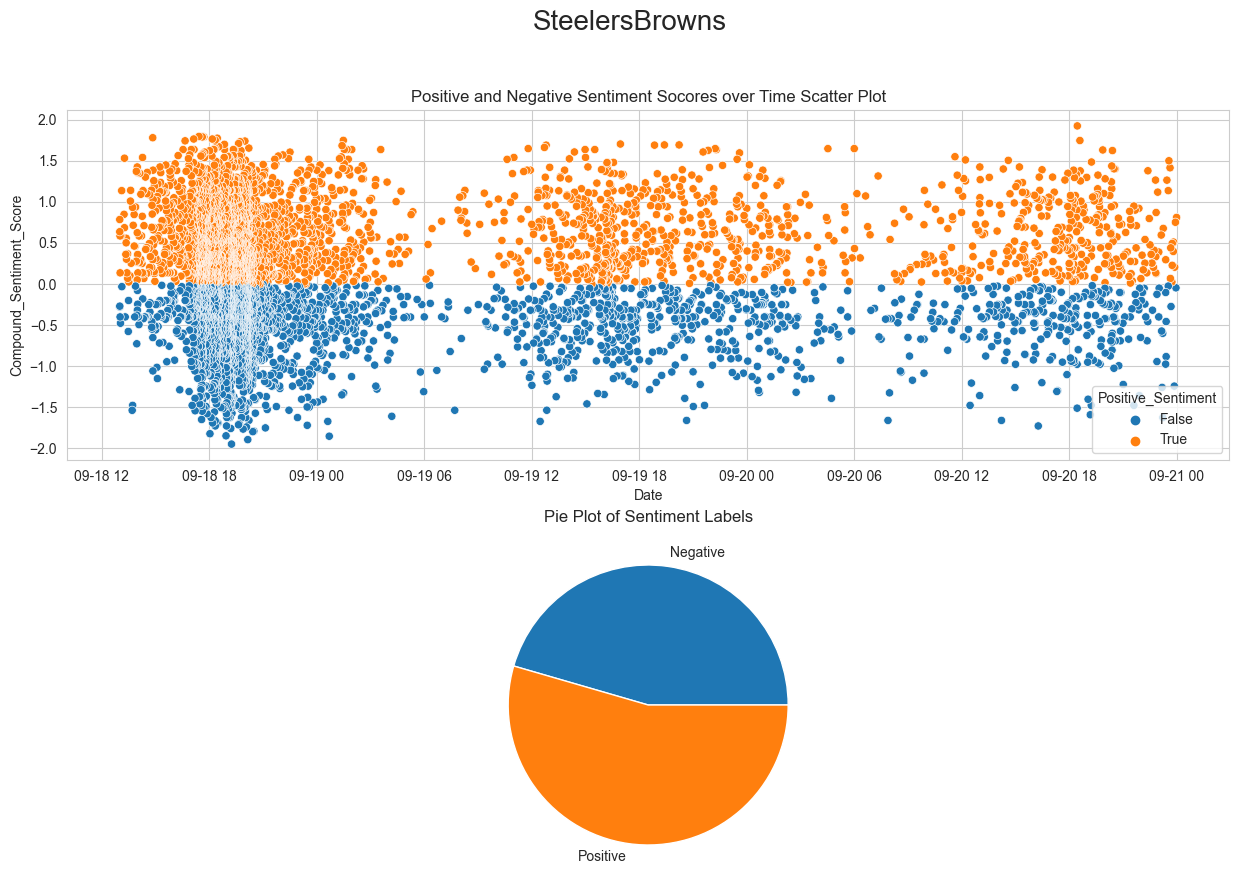

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[3], 'SteelersBrowns', save = True)

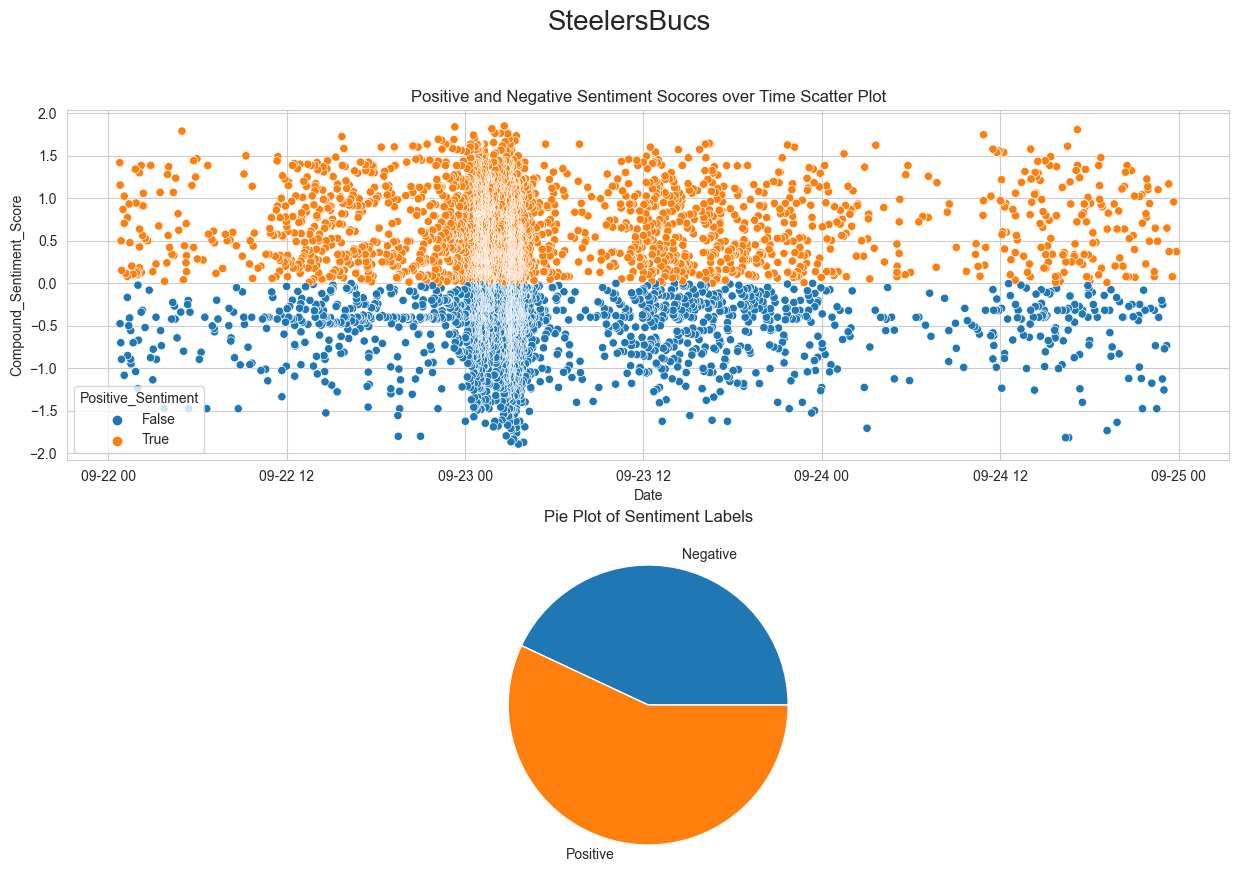

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[4], 'SteelersBucs', save = True)

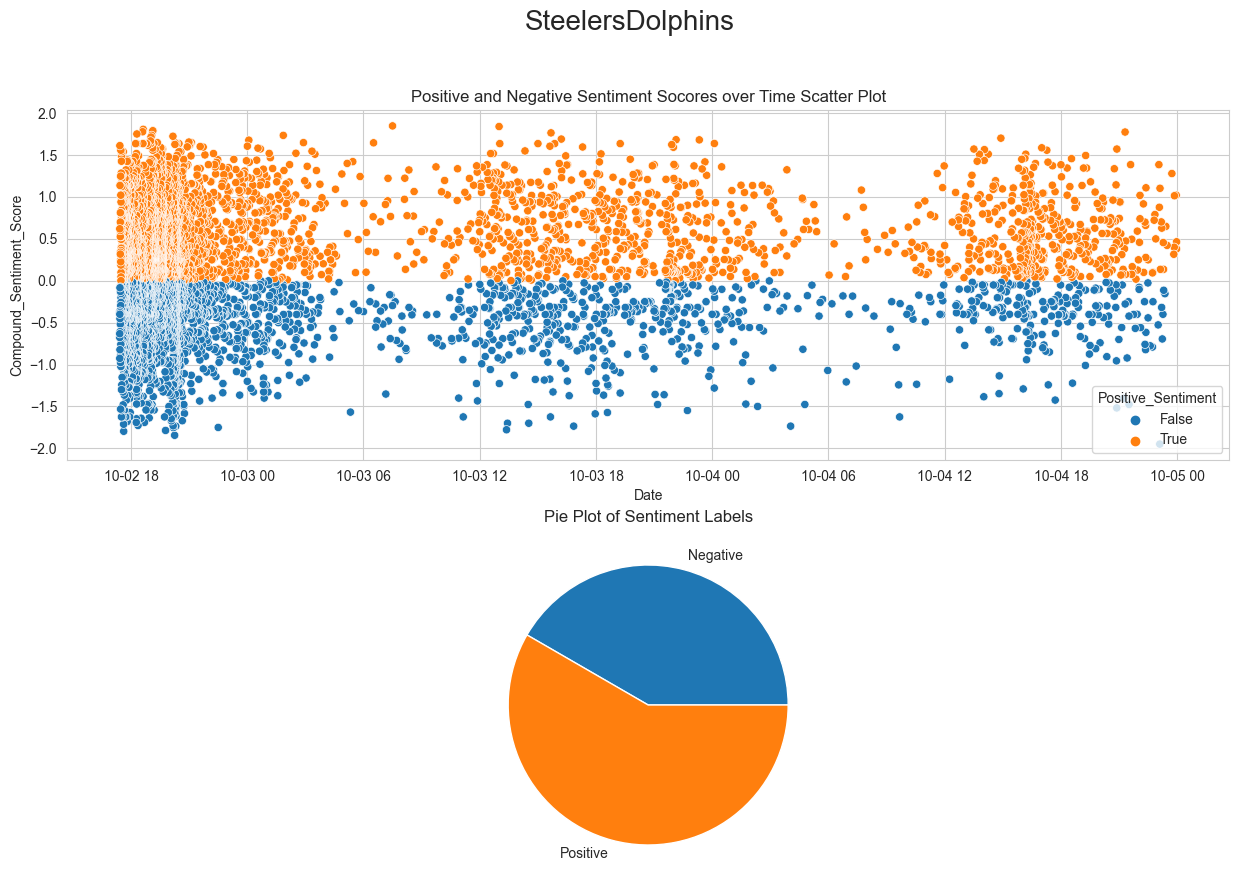

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[5], 'SteelersDolphins', save = True)

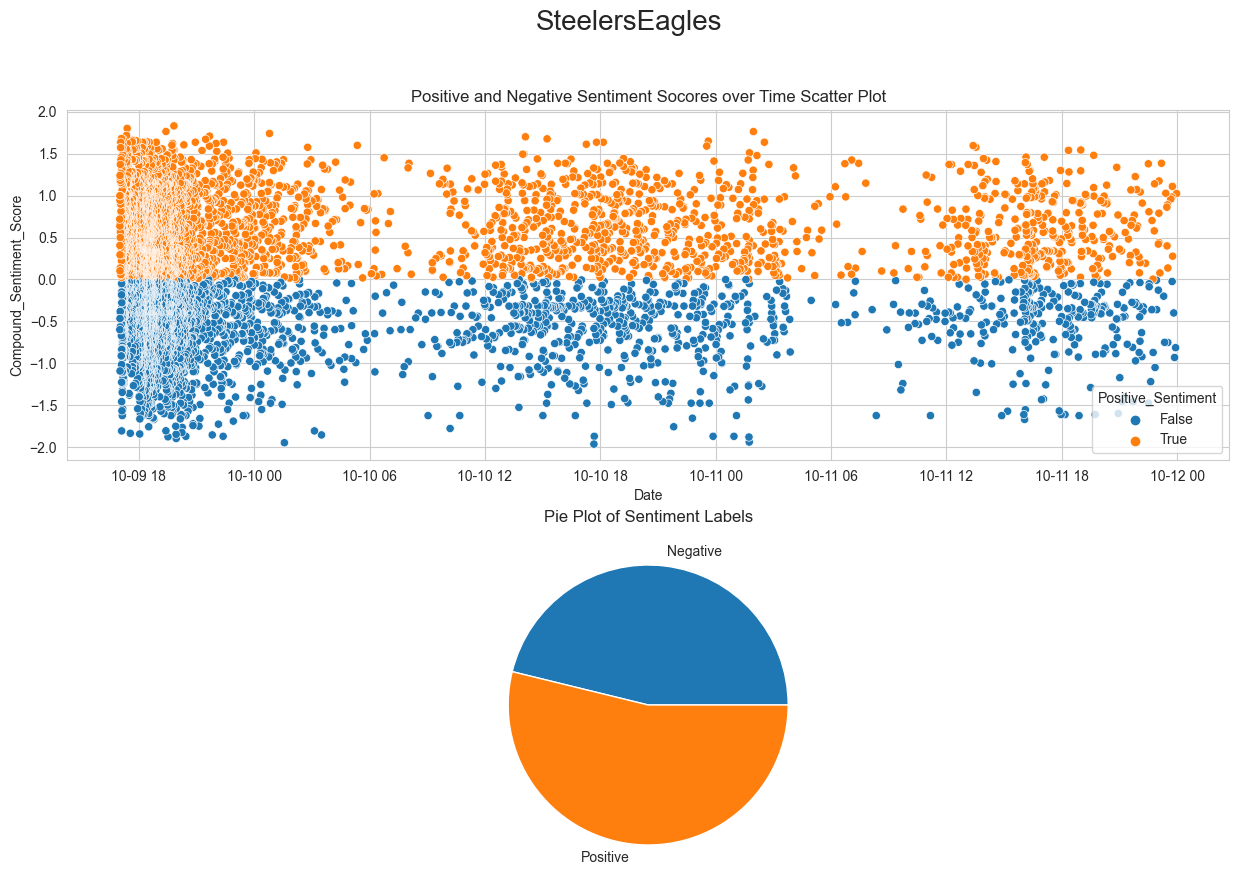

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[6], 'SteelersEagles', save = True)

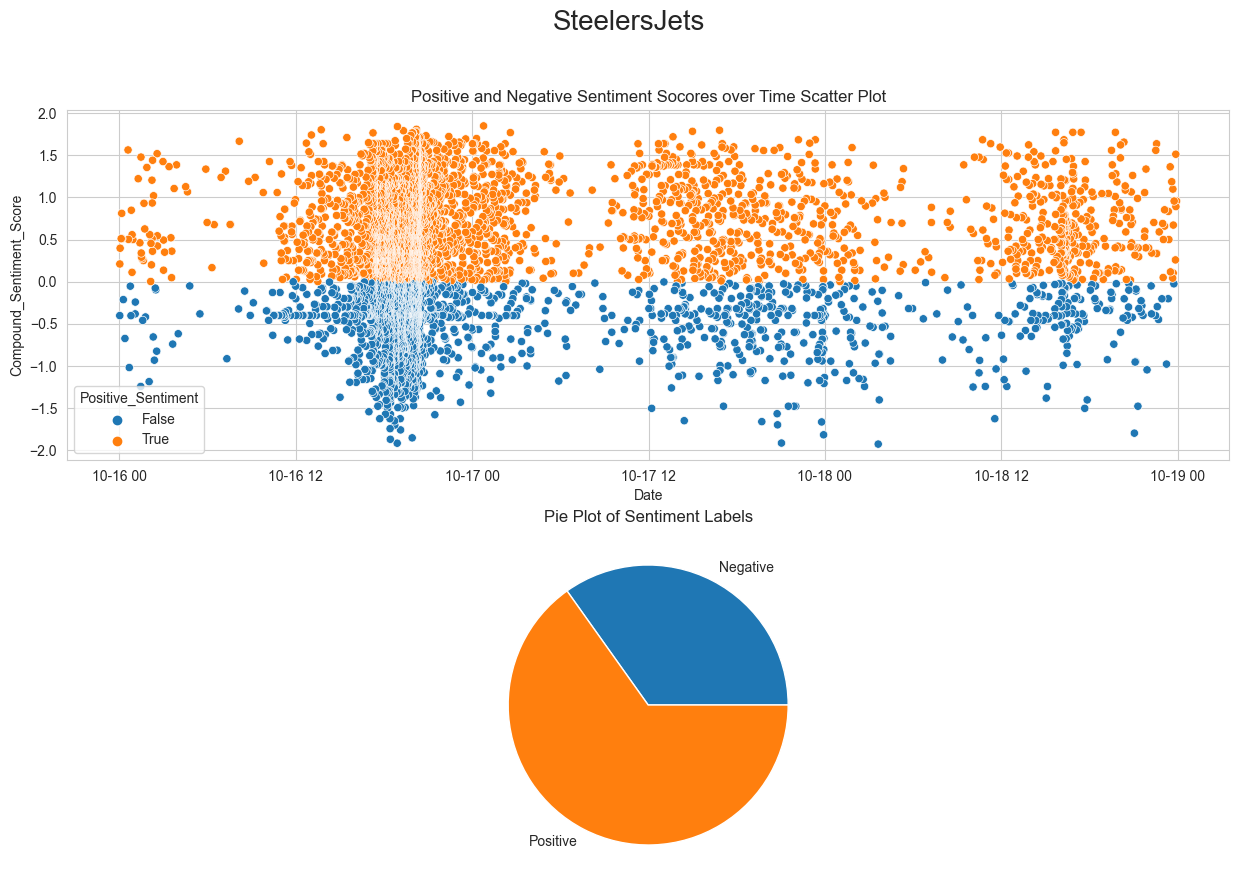

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[7], 'SteelersJets', save = True)

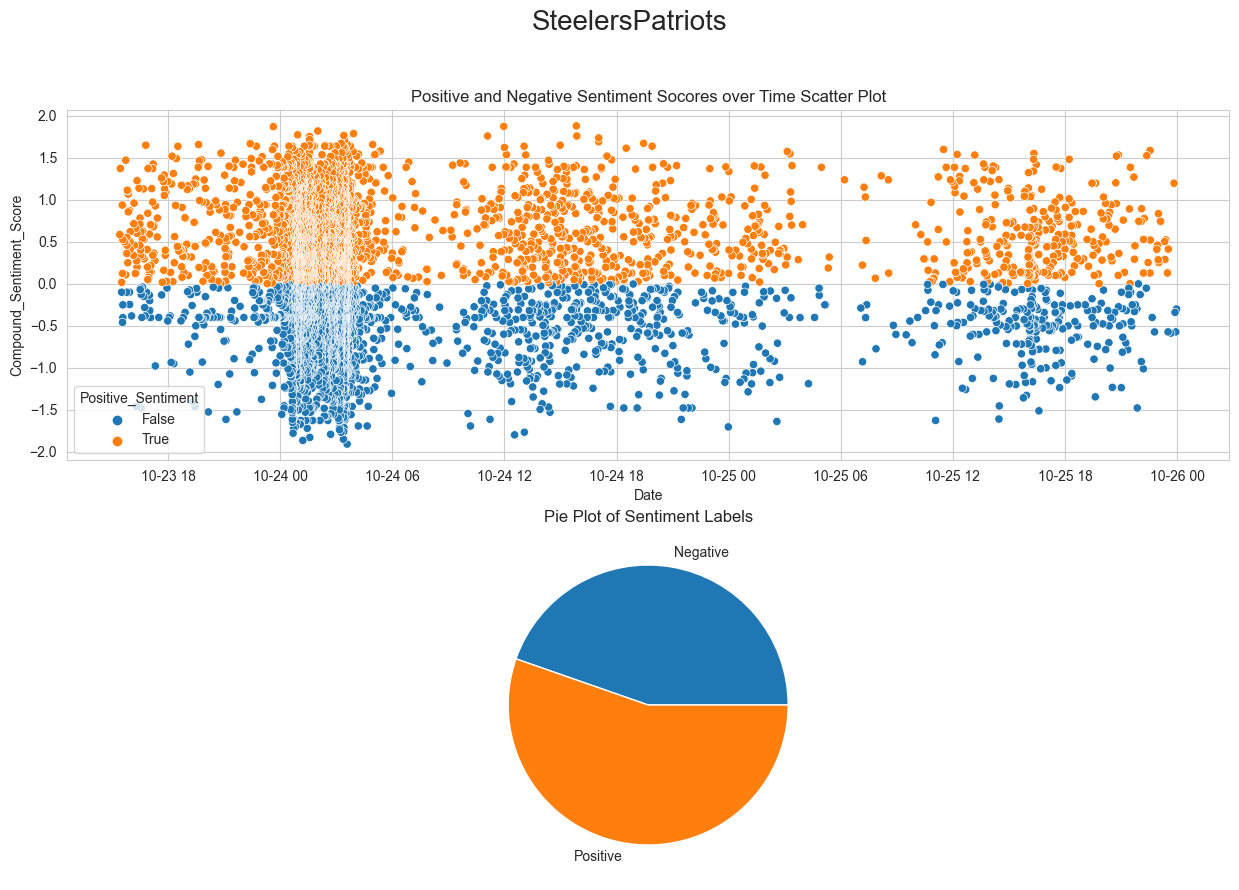

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[8], 'SteelersPatriots', save = True)

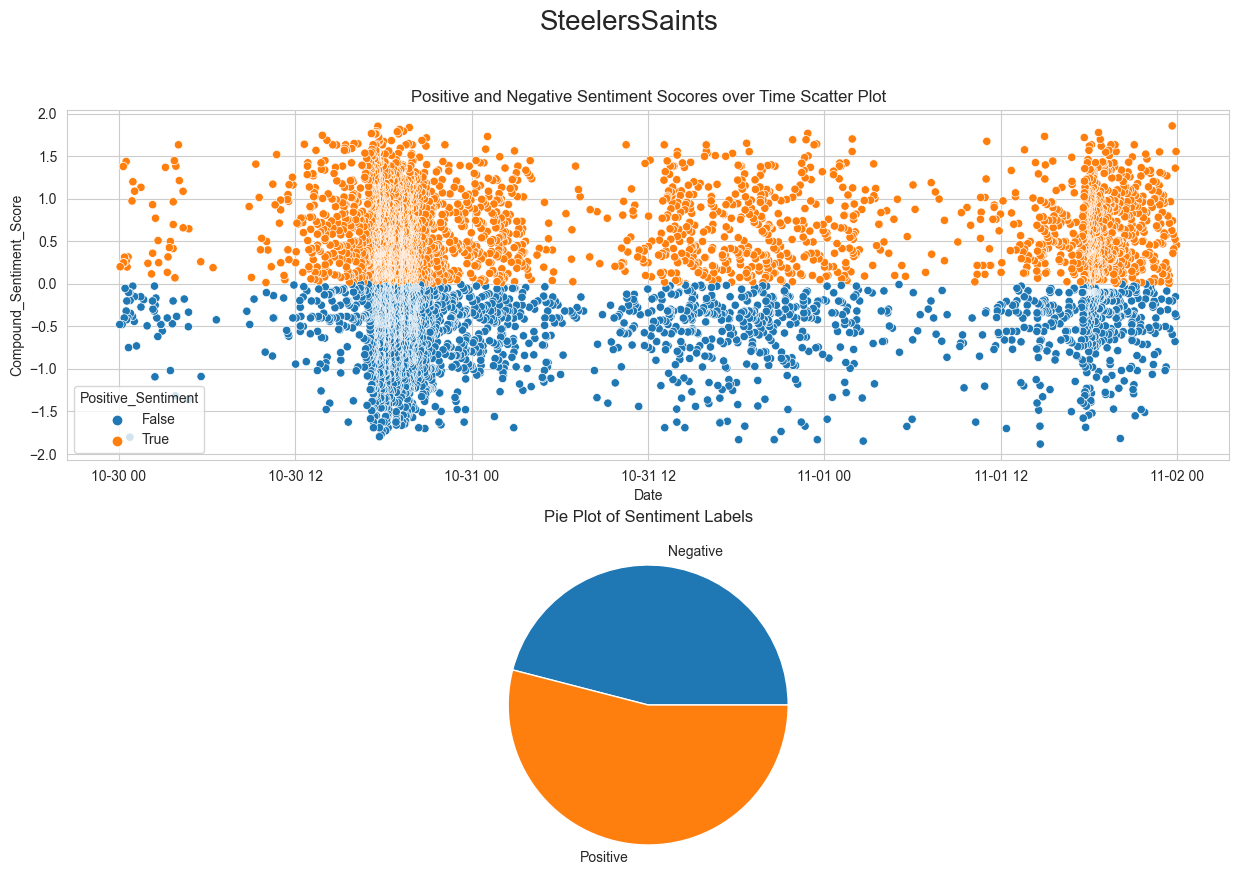

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[9], 'SteelersSaints', save = True)

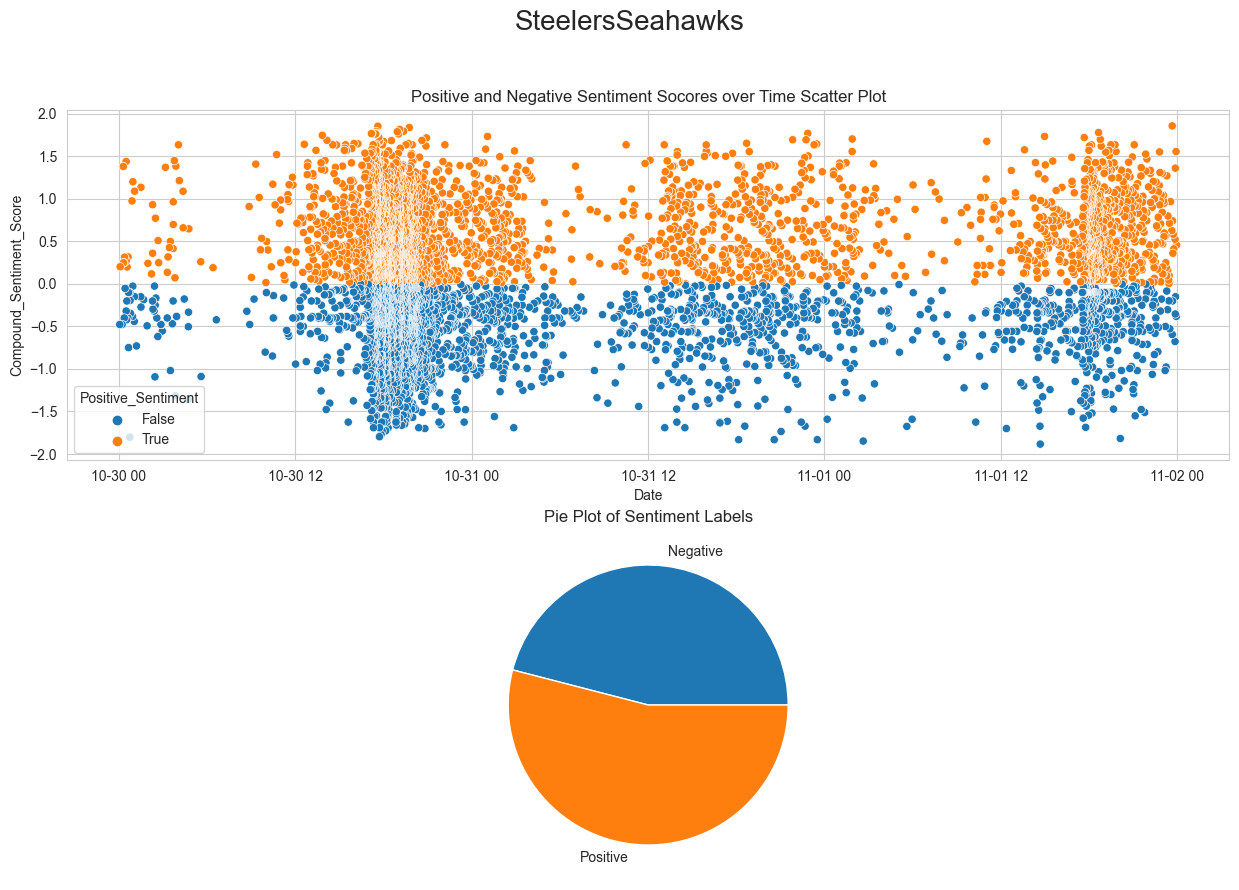

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[9], 'SteelersSeahawks', save = True)

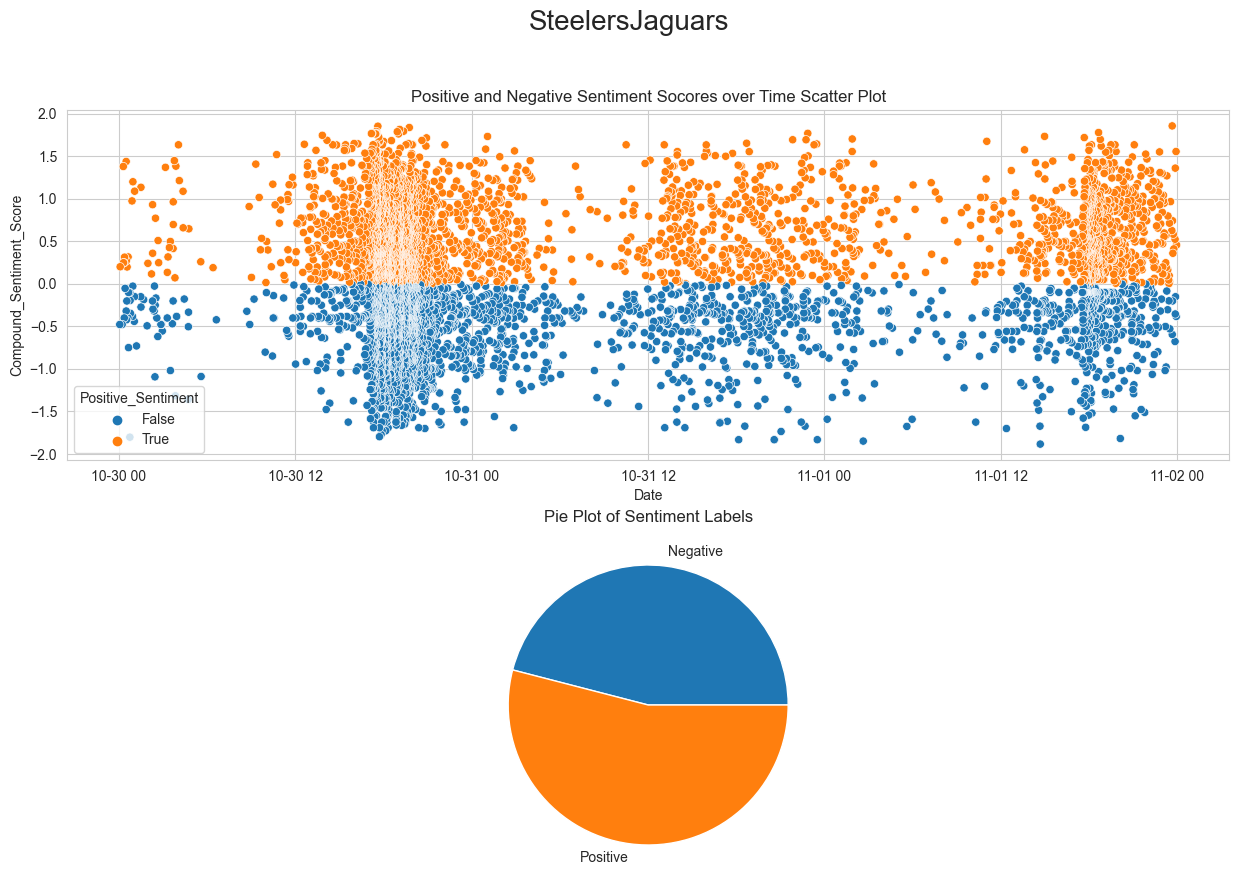

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[9], 'SteelersJaguars', save = True)

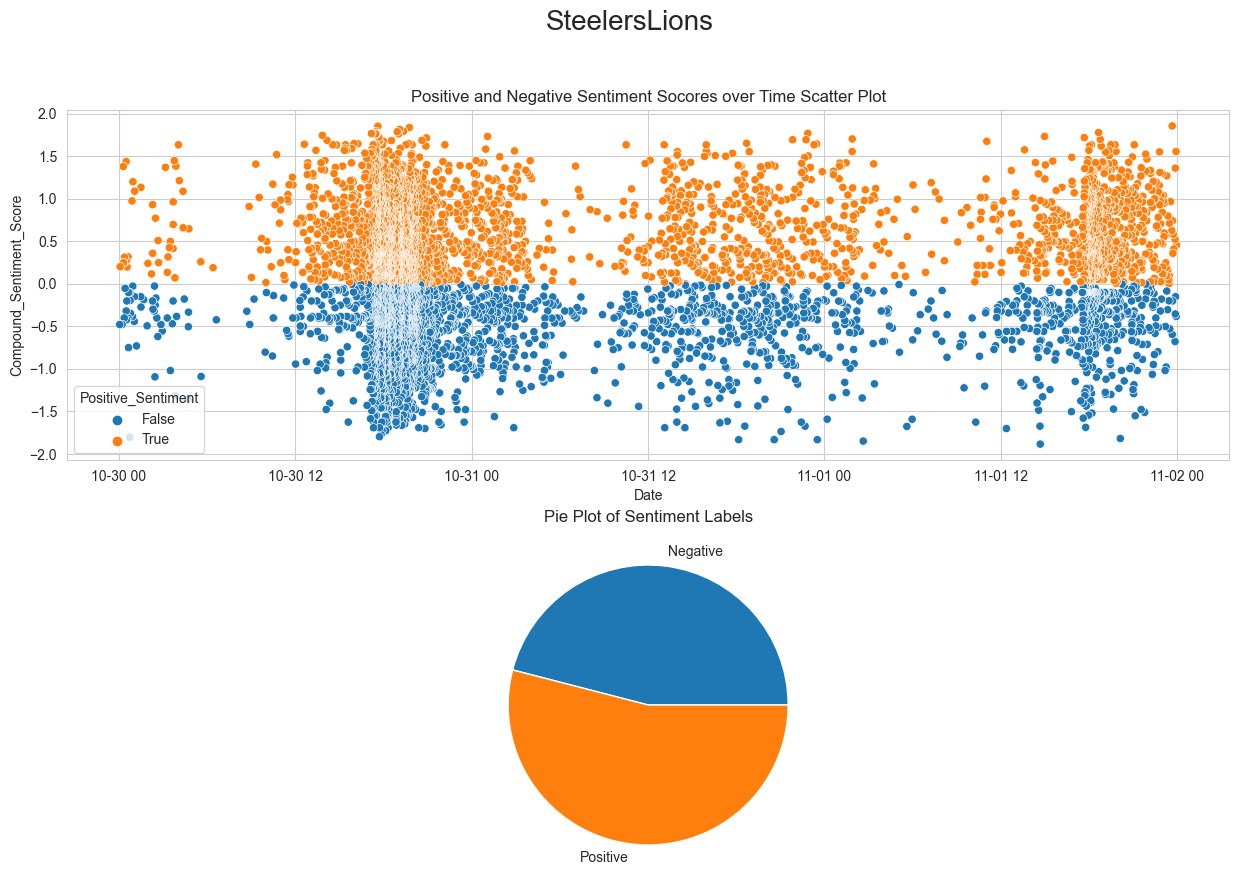

In [ ]:
make_scatter_and_pie_figure(steelers_dfs[9], 'SteelersLions', save = True)